In [6]:
import numpy as np
from scipy.spatial.distance import squareform
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
taxonomy = np.tile(['bird', 'insect', 'primate', 'reptile', 'ungulate'],4)
behavior = np.repeat(['eating', 'fighting', 'running', 'swimming'],5)
conditions_new = [' '.join((beh, tax)) for beh, tax in zip(behavior, taxonomy)]

tax_colors = {
    'bird': 'blue',
    'insect': 'green',
    'primate': 'purple',
    'reptile': 'orange',
    'ungulate': 'red'
}

beh_colors = {
    'eating': 'orange',
    'fighting': 'red',
    'running': 'green',
    'swimming': 'blue'
}

region_names = {
    'EBA': 'Extrastriate Body Area',
    'FFA': 'Fusiform Face Area',
    'IPS': 'Intraparietal Sulcus',
    'PM': 'Primary Motor',
    'OP': 'Occipal Parietal'
}

hem_names = {
    'r': 'Right Hem',
    'l': 'Left Hem'
}

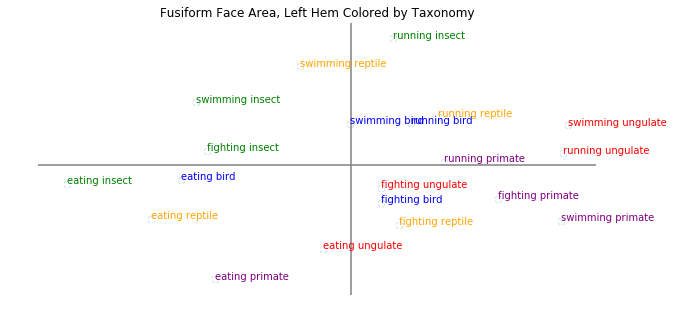

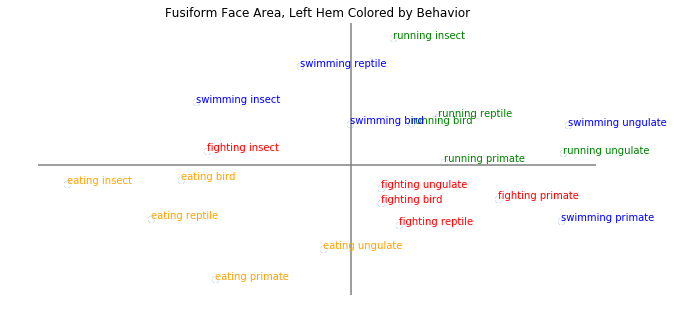

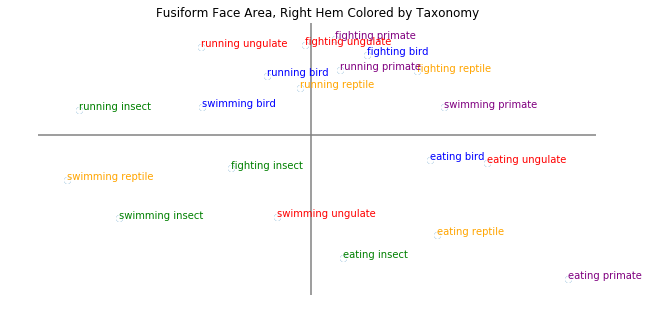

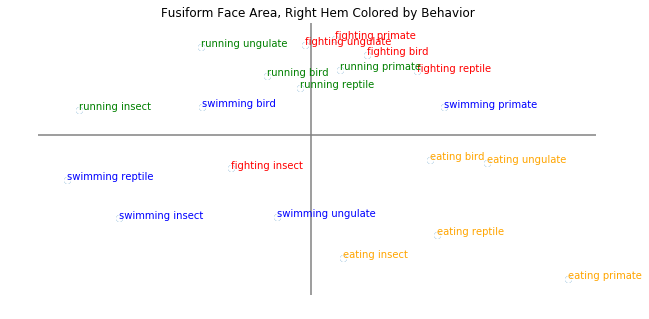

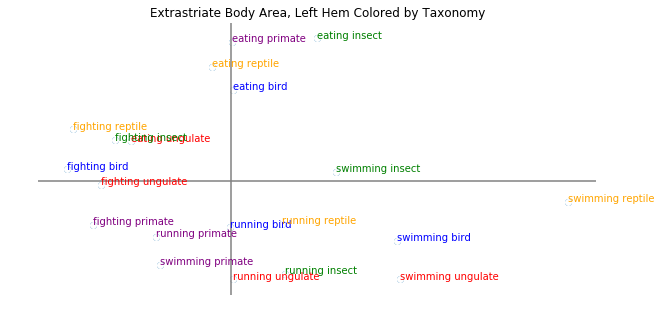

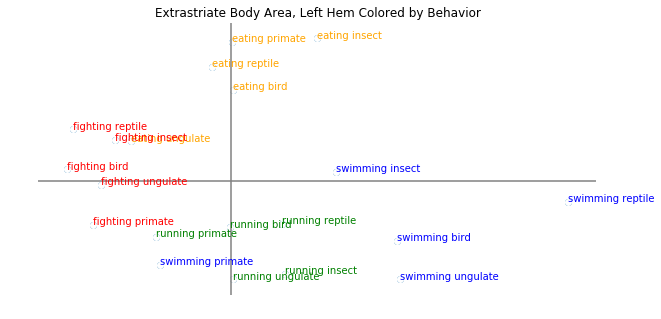

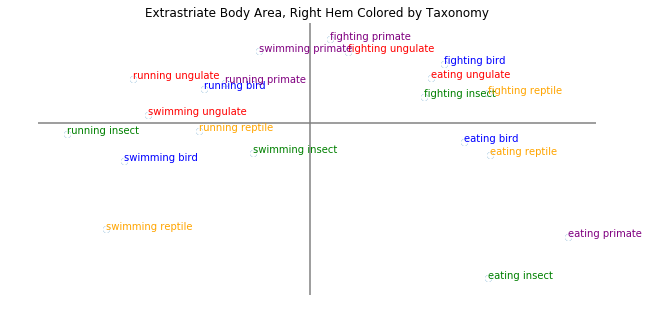

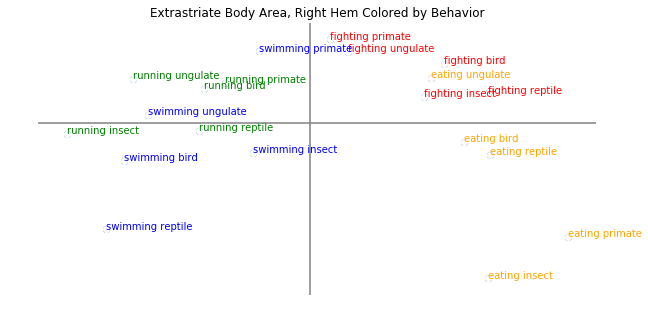

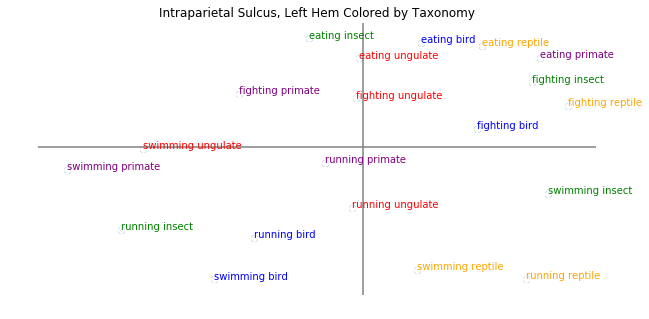

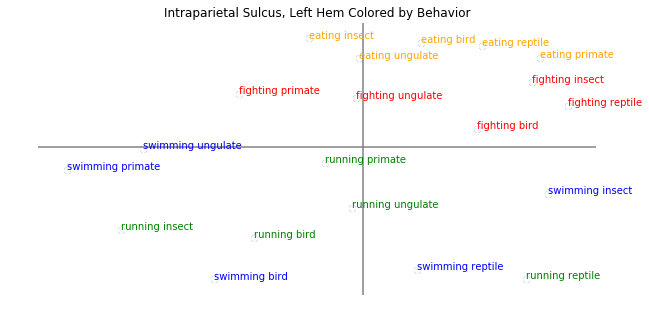

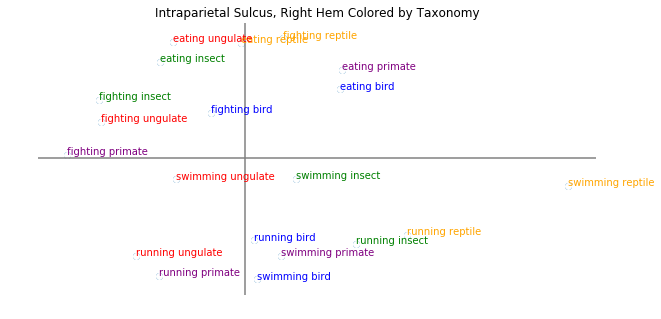

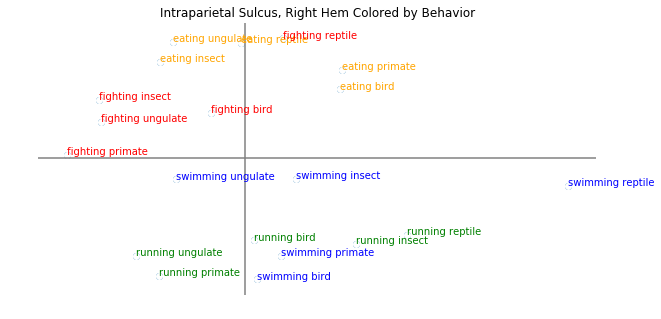

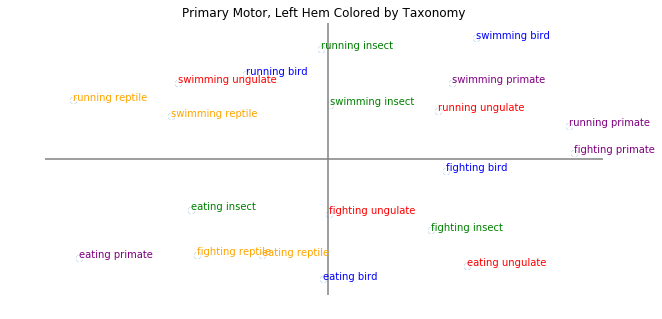

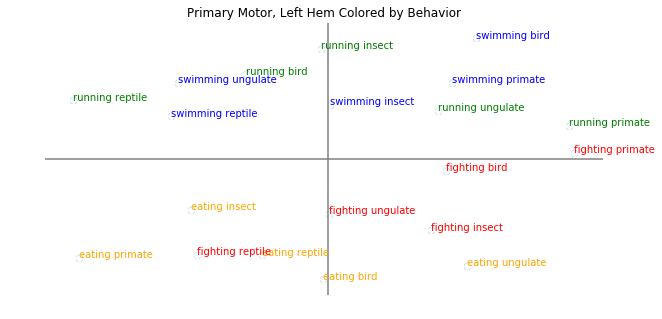

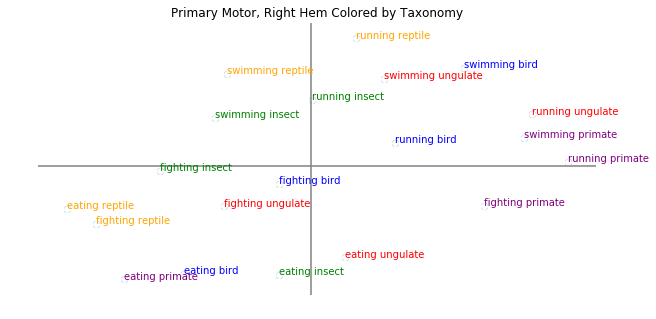

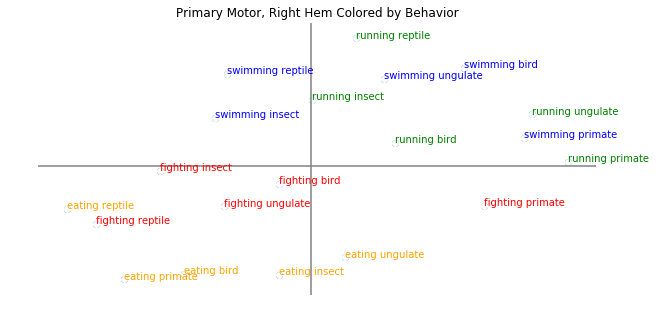

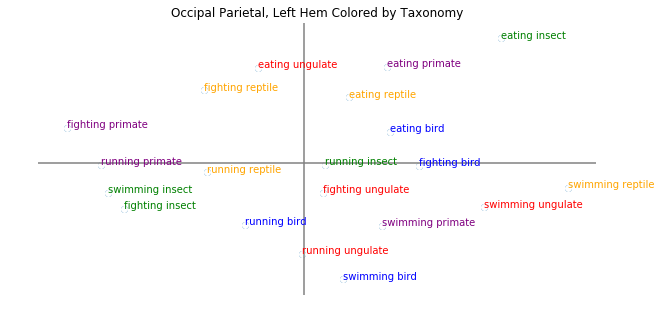

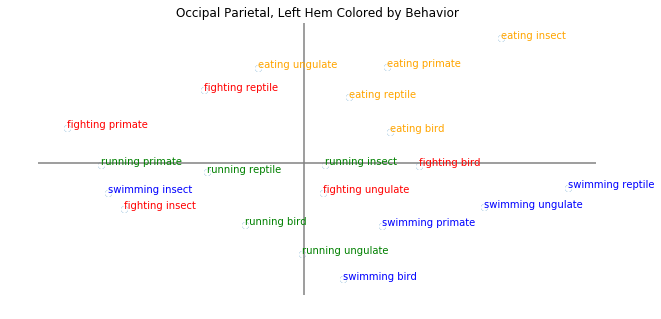

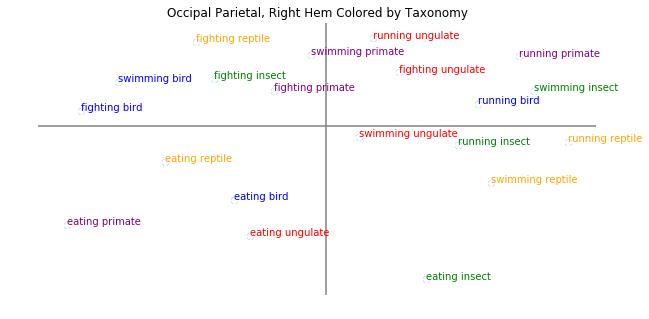

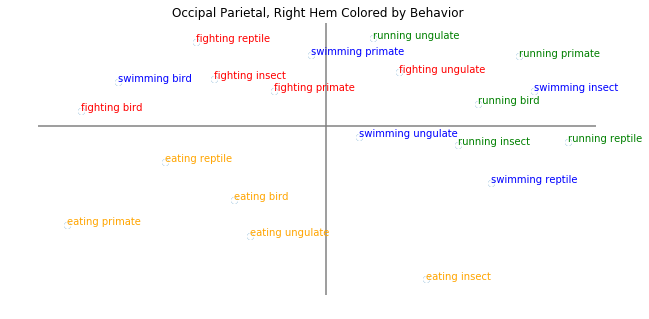

In [9]:
for region in ['FFA', 'EBA', 'IPS', 'PM', 'OP']: 
    for hem in ['l', 'r']:

        # Load RSA Data
        
        rsa = np.load('./lab2/results/rsa_roi_%s_%sh.npy' % (region, hem))

        rdm = squareform(np.mean(rsa, axis=1))
        embedding = MDS(n_components=2)#, metric=False, dissimilarity='precomputed')
        X_transformed = embedding.fit_transform(rdm)

        
        # Plot Taxonomy Colors
        
        plt.figure(figsize=(10,5))
        plt.scatter(X_transformed[:,0], X_transformed[:,1])

        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')

        for i, txt in enumerate(conditions_new):
            plt.scatter(X_transformed[i,0], X_transformed[i,1], color='white')    
            plt.annotate(txt, (X_transformed[i,0], X_transformed[i,1]), color=tax_colors[txt.split(" ")[1]])

        plt.axis('off')
        plt.title('%s, %s Colored by Taxonomy' % (region_names[region], hem_names[hem]))
        plt.savefig('./lab2/figs/%s_%sh_tax_mds.png' % (region, hem))
        plt.show()
        
        
        
        # Plot Behavior Colors
        
        plt.figure(figsize=(10,5))
        plt.scatter(X_transformed[:,0], X_transformed[:,1])

        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')

        for i, txt in enumerate(conditions_new):
            plt.scatter(X_transformed[i,0], X_transformed[i,1], color='white')    
            plt.annotate(txt, (X_transformed[i,0], X_transformed[i,1]), color=beh_colors[txt.split(" ")[0]])

        plt.axis('off')
        plt.title('%s, %s Colored by Behavior' % (region_names[region], hem_names[hem]))
        plt.savefig('./lab2/figs/%s_%sh_beh_mds.png' % (region, hem))

        plt.show()



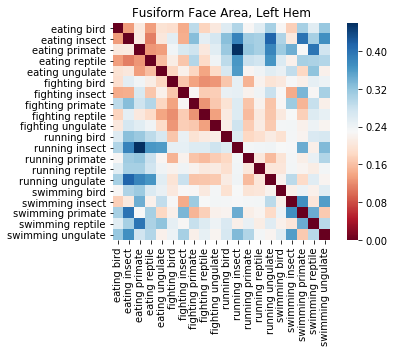

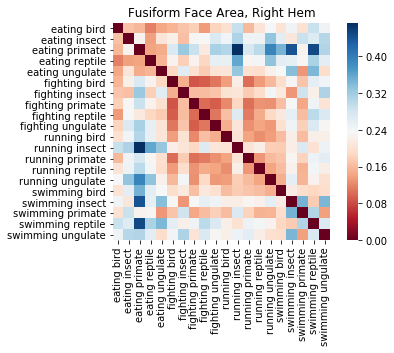

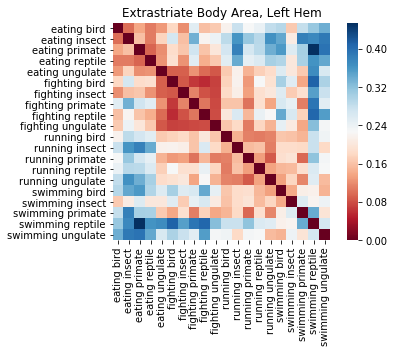

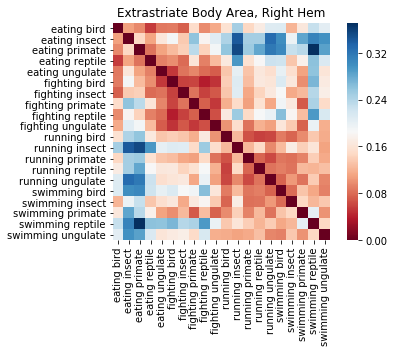

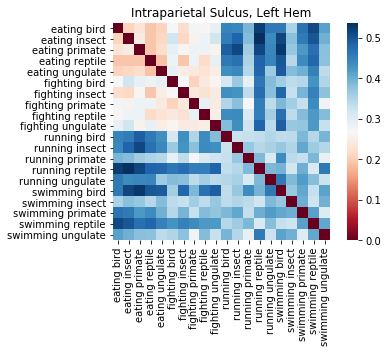

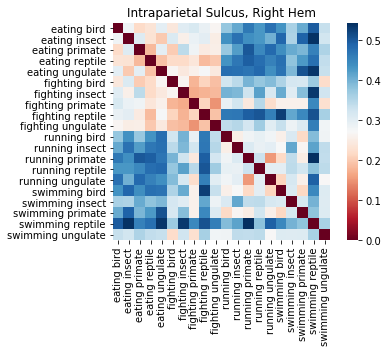

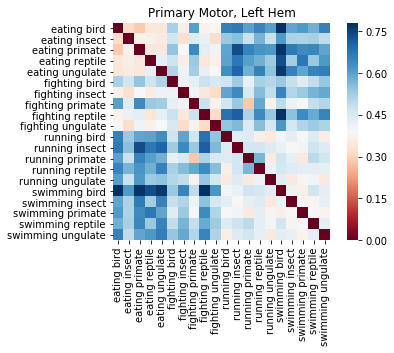

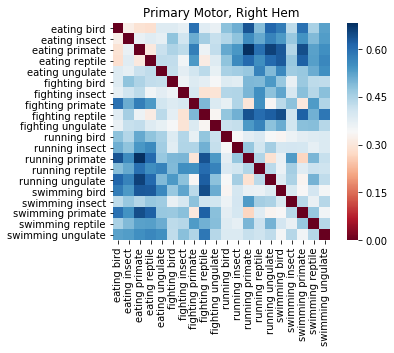

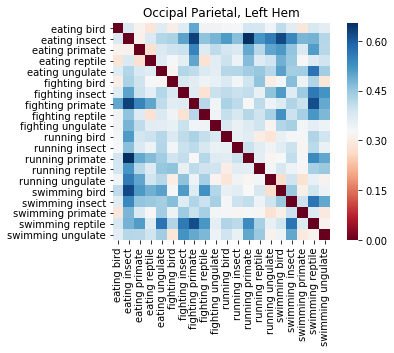

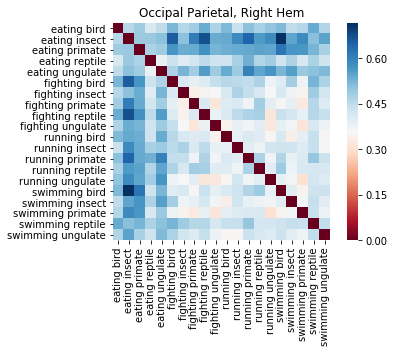

In [10]:
import seaborn as sns

taxonomy = np.repeat(['bird', 'insect', 'primate', 'reptile', 'ungulate'],4)
behavior = np.tile(['eating', 'fighting', 'running', 'swimming'],5)
conditions = [' '.join((beh, tax)) for tax, beh in zip(taxonomy, behavior)]


for region in ['FFA', 'EBA', 'IPS', 'PM', 'OP']: 
    for hem in ['l', 'r']:

        rsa = np.load('./lab2/results/rsa_roi_%s_%sh.npy' % (region, hem))
        rdm = squareform(np.mean(rsa, axis=1))


        prdm = pd.DataFrame(rdm)

        prdm.columns = conditions_new
        prdm.index = conditions_new

        mask = np.zeros_like(rdm)
        mask[np.triu_indices_from(mask)] = True

        sns.heatmap(prdm, square=True,cmap="RdBu")

        plt.title('%s, %s' % (region_names[region], hem_names[hem]))
        plt.savefig('./lab2/figs/%s_%sh_rdm.png' % (region, hem))
        plt.show()
